In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Linear Regression 
Highway-mpg

In [4]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [43]:
X = df[['highway-mpg']]
Y = df['price']
L.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
Yhat = L.predict(X)

In [7]:
L.intercept_,L.coef_

(38423.305858157386, array([-821.73337832]))

In [8]:
print('Equation:',L.intercept_,'+',L.coef_[0],'*highway-mpg')

Equation: 38423.305858157386 + -821.7333783219252 *highway-mpg


Engine size 

In [9]:
L = LinearRegression()
X = df[['engine-size']]
Y = df['price']
L.fit(X,Y)
Yhat = L.predict(X)
print('Equation:',L.intercept_,'+',L.coef_[0],'*engine-size') 

Equation: -7963.338906281049 + 166.860015691416 *engine-size


#### Multiple Regression 
<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [10]:
L = LinearRegression()
X = df[['horsepower','curb-weight','engine-size','highway-mpg']]
Y = df['price']
L.fit(X,Y)
Yhat = L.predict(X)
print(L.intercept_)
print(L.coef_)

-15806.624626329198
[53.49574423  4.70770099 81.53026382 36.05748882]


<ul>
    <li>Normalised Losses</li>
    <li>Highway-mpg</li>
</ul>

In [11]:
L = LinearRegression()
X = df[['normalized-losses','highway-mpg']]
Y = df['price']
L.fit(X,Y)
Yhat = L.predict(X)
print(L.intercept_)
print(L.coef_)

38201.31327245728
[   1.49789586 -820.45434016]


#### Model evaluation using Visualization 
Regression Plot

(0, 48295.23947516503)

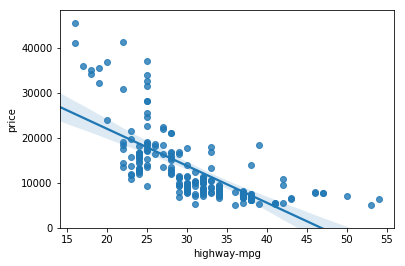

In [12]:
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0, 47436.148325769056)

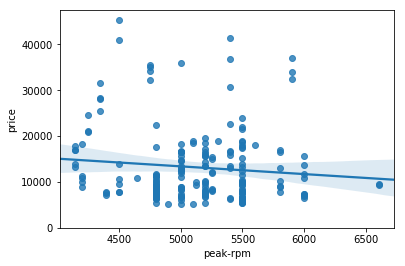

In [13]:
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [14]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


Residual Plot 
It is good way to visualize the variance of the data.
The difference between the observed value(y) and the predicted value(yhat) is called Residual value(e). In the regplot, residual is the distance between the data point and the fitted line.
A residual plot shows the residuals on the y axis and the independent variable on the x axis.
We should pay attention to the spread of the residuals. If the points in the residual plot is randomly spread out around the x axis, then linear model is appropriate for the data. Randomly spread out data means constant variance, thus linear model is good for the model.

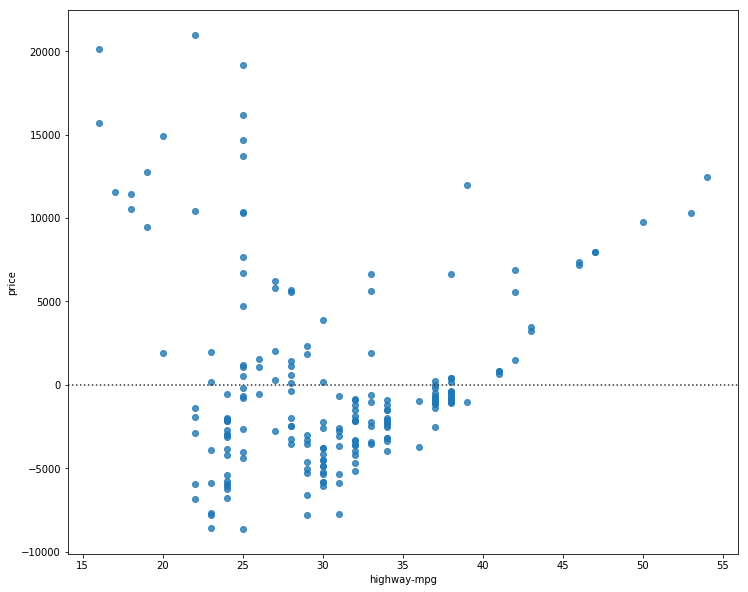

In [15]:
plt.figure(figsize=(12,10))
sns.residplot(df['highway-mpg'],df['price'])

In the plot above, the residuals are not randomly spread around the x axis, which maybe an indication that the non linear mdoel maybe appropriate for the data 

Multiple Regression 

Text(0, 0.5, 'Proportion of Cars')

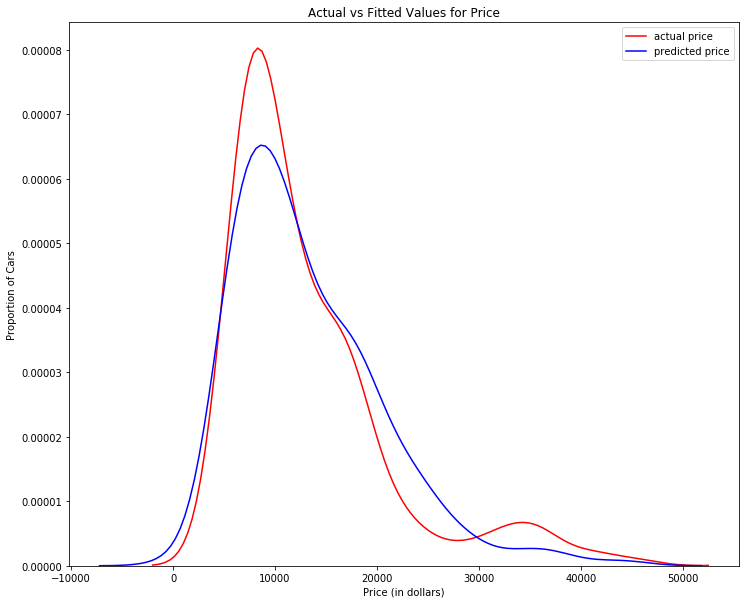

In [37]:
L = LinearRegression()
X = df[['horsepower','curb-weight','engine-size','highway-mpg']]
Y = df['price']
L.fit(X,Y)
Yhat = L.predict(X)
plt.figure(figsize=(12,10))
sns.distplot(df['price'],hist=False,color='r',label='actual price')
sns.distplot(Yhat,hist=False,color='b',label='predicted price')
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

#### Polynomial Regression and Pipelines 

In [17]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


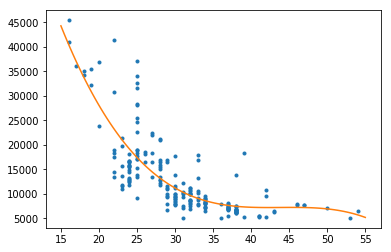

In [18]:
x_new = np.linspace(15,55,100)
y_new = p(x_new)
plt.plot(x,y,'.')
plt.plot(x_new,y_new,'-')

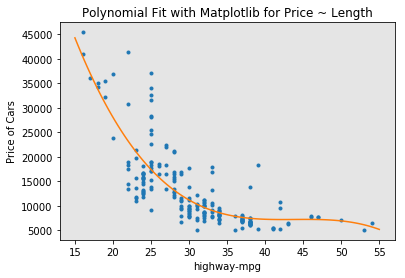

In [19]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
PlotPolly(p,x,y,'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


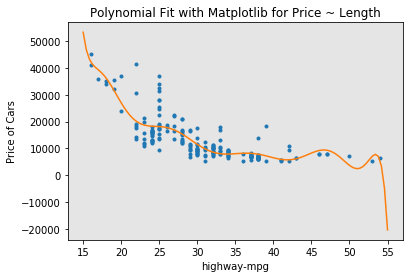

In [20]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'highway-mpg')

Multivariate Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
P

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [22]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]
Z_P = P.fit_transform(Z)
print(Z.shape)
print(Z_P.shape)

(201, 4)
(201, 15)


#### Pipeline
Data Pipeline simplifies the steps of data preprocessing 

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
Input = [
    ('scale',StandardScaler()),
    ('polynomial',PolynomialFeatures(include_bias=False)),
    ('model',LinearRegression())
]
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [25]:
pipe.fit(Z,y)

C:\Users\shbnd\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shbnd\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [26]:
Ypipe = pipe.predict(Z)
print(Ypipe[:5])

[13102.74784201 13102.74784201 18225.54572197 10390.29636555
 16136.29619164]


C:\Users\shbnd\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [27]:
Input1 = [
    ('scale',StandardScaler()),
    ('model',LinearRegression())
]
pipe1 = Pipeline(Input1)
pipe1.fit(Z,y)
ypipe1 = pipe1.predict(Z)
print(ypipe1[:5])

[13699.11161184 13699.11161184 19051.65470233 10620.36193015
 15521.31420211]


C:\Users\shbnd\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shbnd\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\shbnd\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


#### Measures for In-Sample Evaluation
R squared is also known as the coefficient of determination, is a measure of close the data is to the fitted line. The value of R squared is the percentage of variance of the response variable that is explained by the model.

Mean Squared Error (MSE) measures the average of square of errors, that is the difference between actual and predicted valeus 

In [28]:
# simple linear model 
L.fit(X,Y)
L.score(X,Y) # R square 

0.8093562806577457

It can be said that 49.65 % of the variance can be explained by the model

In [29]:
Yhat = L.predict(X)

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y,Yhat)

11980366.87072649

In [31]:
# multiple regression model 
L.fit(X,Y)
L.score(X,Y)

0.8093562806577457

In [32]:
Yhat = L.predict(X)
mean_squared_error(Y,Yhat)

11980366.87072649

In [33]:
# polynomial model 
from sklearn.metrics import r2_score
r2_score(y,p(x))

0.6741946663906513

In [34]:
mean_squared_error(y,p(x))

20474146.42636125

#### Prediction and Decision Making 
Prediction 

In [35]:
new_input = np.arange(1,100,1).reshape(-1,1)

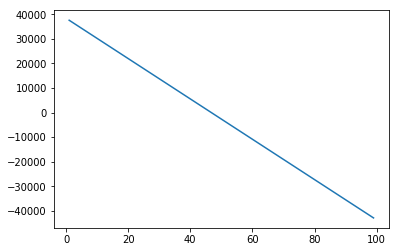

In [45]:
X = df[['highway-mpg']]
Y = df['price']
L.fit(X,Y)
Yhat = L.predict(new_input)
plt.plot(new_input,Yhat)

Decision Making

<ul>
    <li> When comparing 2 models, the model with higher R squared value, is a better fit for the data</li>
    <li> When comparing 2 models, the model with lower MSE value, it a better fit for the data </li>
</ul>

The MSE of the MLR model is smaller, the R squared of the SLR is very small compared to MLR.
The R squared value along with MSE, show that the MLR is a better model than SLR

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>